In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to C:\Users\WIN
[nltk_data]     11-24H2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd

product = pd.read_csv(
    "dataset/amazon_com-product_reviews__20200101_20200331_sample.csv"
)

product.head()

,Uniq Id,Crawl Timestamp,Billing Uniq Id,Rating,Review Title,Review Rating,Review Date,User Id,Brand,Category,Sub Category,Product Description,Asin,Url,Review Content,Verified Purchase,Helpful Review Count,Manufacturer Response
0,10d8b81dc693db8a3f92e19254525d53,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Best Natural Deodorant!!,5.0,"March 6, 2020",AGIZFDSHLSBZ7KHQ4FV65W7B3HMQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2Q...,This is the one natural deodorant that works f...,Verified Purchase,0,NaN
1,31ef1ee4961d3fcff33e363edd7677eb,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Schmidt's Charcoal Deodorant is the best!,5.0,"March 6, 2020",AHOZPYWO6WE5MLAZZPDUAWNKKNRQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R14...,I am staying away from the conventional deodor...,Verified Purchase,0,NaN
2,6943e517922b051cbec496be32fbb57f,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Beware. Defective or counterfeit.,1.0,"March 6, 2020",AECC6GYWWLNCKSBG3DZDGFSYDOTA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2R...,Do not buy this from Amazon it's either defect...,Verified Purchase,One person found this helpful Helpful,NaN
3,6778c794e6ac7112981d4ebb239d6826,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Good for infrequent shavers in cooler months i...,3.0,"March 5, 2020",AEOO6OOEO4QD7Z4F6C2FMZUCW7PA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/RMI...,I started using this because I was getting cys...,NO,0,NaN
4,2335a28ae24db3b2191080bfd98a86e0,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,This isn’t the true product and will hurt your...,1.0,"March 2, 2020",AEHSDCGRIMVOUG6ST35FJ4FMMW5Q,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R1R...,Dont buy this from amazon!!!! I never write re...,Verified Purchase,One person found this helpful Helpful,NaN


In [4]:
product = product[['Review Content', 'Review Rating']]
product.dropna(inplace=True)

In [5]:
def get_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    else:
        return 'Positive'

product['sentiment'] = product['Review Rating'].apply(get_sentiment)
product.head()

,Review Content,Review Rating,sentiment
0,This is the one natural deodorant that works f...,5.0,Positive
1,I am staying away from the conventional deodor...,5.0,Positive
2,Do not buy this from Amazon it's either defect...,1.0,Negative
3,I started using this because I was getting cys...,3.0,Positive
4,Dont buy this from amazon!!!! I never write re...,1.0,Negative


In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

product['cleaned_review'] = product['Review Content'].apply(clean_text)


In [7]:
X = product['cleaned_review']
y = product['sentiment']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [10]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [11]:
y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10

[[0 1]
 [0 9]]


C:\Users\WIN 11-24H2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\WIN 11-24H2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\WIN 11-24H2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
def predict_sentiment(review):
    review = clean_text(review)                 
    review_vec = vectorizer.transform([review]) 
    prediction = model.predict(review_vec)     
    return prediction[0]

predict_sentiment("This product is amazing!")

'Positive'

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_vec)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



C:\Users\WIN 11-24H2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\WIN 11-24H2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\WIN 11-24H2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


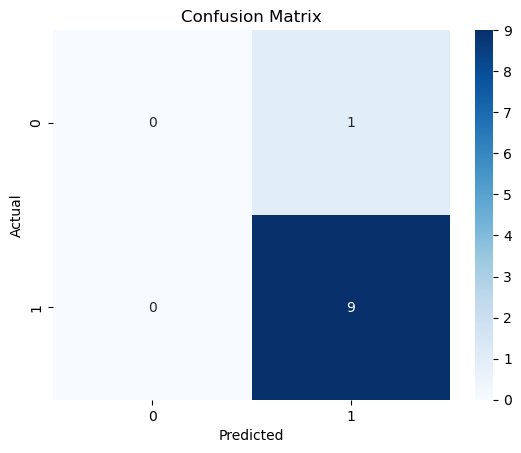

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()